#UFUK CEM BIRBIRI

## Assigments 1.1

This first part of the assignments is based on the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

print('There are ' + str(len(data_feature_names)) + ' features, whose names are: \n' + str(data_feature_names))
print('\nThere are ' + str(len(target_names)) + ' classes to predict, whose names are: \n' + str(target_names))
print('\nThere are ' + str(data.shape[0]) + ' observations')

There are 4 features, whose names are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

There are 3 classes to predict, whose names are: 
['setosa' 'versicolor' 'virginica']

There are 150 observations


$\mathbf{Exercise\, 1.}$ Compute the median, mean and standard deviation for each of the 4 features in the iris dataset (don't use numpy or other pre-defined functions, write your own routine).

In [157]:
#Let's take the transpose of the data to use it below functions

print(data.shape)
data=data.T
print(data.shape)

(150, 4)
(4, 150)


####MEAN

In [158]:
def get_mean(data):
  n = len(data)
  summ=0
  for i in range(n):
      summ +=data[i]
  return  summ / n


means=[]
for i in range(len(iris_dataset.feature_names)):
  #Save them for Exercise.2
  means.append(get_mean(data[i]))

  print("mean of ",iris_dataset.feature_names[i][:12],"= ",get_mean(data[i]))


mean of  sepal length =  5.843333333333335
mean of  sepal width  =  3.057333333333334
mean of  petal length =  3.7580000000000027
mean of  petal width  =  1.199333333333334


####MEDIAN

In [159]:

def get_median(data):
  #Sort data
  data_sorted = sorted(data)

  #Even
  if len(data)%2 ==0:
      median_= (data_sorted[int(len(data)/2)] + data_sorted[int(len(data)/2)-1]) / 2.0
  #Odd
  else: 
      median_ = data_sorted[int(len(data)/2)]
  return median_

medians=[]
for i in range(len(iris_dataset.feature_names)):

  #Save them for Exercise.2
  medians.append( get_median(data[i]))
  print("median of ",iris_dataset.feature_names[i][:12],"= ",get_median(data[i]))


median of  sepal length =  5.8
median of  sepal width  =  3.0
median of  petal length =  4.35
median of  petal width  =  1.3


####STANDART DEVIATION

In [160]:
import math

def variance(data):
  n = len(data)
  mean = get_mean(data)
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  return variance

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

std=[]
for i in range(len(iris_dataset.feature_names)):

  #Save them for Exercise.2
  std.append(stdev(data[i]))
  print("Standart Deviation of ",iris_dataset.feature_names[i][:12],"= ",stdev(data[i]))

Standart Deviation of  sepal length =  0.8253012917851409
Standart Deviation of  sepal width  =  0.43441096773549437
Standart Deviation of  petal length =  1.7594040657753032
Standart Deviation of  petal width  =  0.7596926279021594


$\mathbf{Exercise\, 2.}$ For each feature, generate 150 Gaussian distributed samples with the same mean and standard_deviation computed in Exercise 1.

In [161]:
import numpy as np
import random

#Set random seed
random.seed(10)

samples=[]
for i in range(len(iris_dataset.feature_names)):
  fake_data = [random.gauss(means[i],std[i]) for _ in range(150)]
  samples.append(fake_data) 

#samples = np.array(samples)
print(np.array(samples).shape)

(4, 150)


$\mathbf{Exercise\, 3.}$ Compute the histogram (with 30 bins) of the distribution of the generate samples and plot it together with the histogram of the original data. The histograms must be plotted on the same plot. Comment on the difference between simulations and real data: for which feature the distributions are most different? What is the reason? 

####1. Sepal Length

Mean of sepal length = 5.843333333333335
Std of sepal length = 0.8253012917851409
Median of sepal length = 5.8


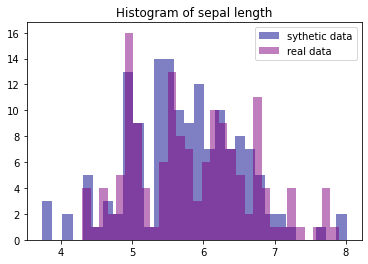

In [162]:
import pandas as pd
import numpy
from matplotlib import pyplot


bins = 30

#Feature name: sepal length
print("Mean of "+iris_dataset.feature_names[0][:12] +' = '+ str(means[0]))
print("Std of "+iris_dataset.feature_names[0][:12] +' = '+ str(std[0]))
print("Median of "+iris_dataset.feature_names[0][:12] +' = '+ str(medians[0]))


pyplot.hist(samples[0], bins, alpha=0.5, label='sythetic data', color='darkblue')
pyplot.hist(data[0], bins, alpha=0.5, label='real data', color=  "purple")
pyplot.legend(loc='upper right')
pyplot.title("Histogram of "+ iris_dataset.feature_names[0][:12])
pyplot.show()

The difference between the simulation and real data is not huge. They mostly overlap in the histogram

####2. Sepal Width

Mean of sepal width  = 3.057333333333334
Std of sepal width  = 0.43441096773549437
Median of sepal width  = 3.0


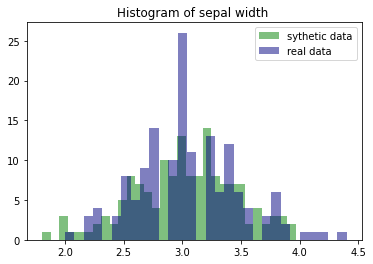

In [164]:

#Feature name: sepal width
print("Mean of "+iris_dataset.feature_names[1][:12] +' = '+ str(means[1]))
print("Std of "+iris_dataset.feature_names[1][:12] +' = '+ str(std[1]))
print("Median of "+ iris_dataset.feature_names[1][:12] +' = '+ str(medians[1]))


pyplot.hist(samples[1], bins, alpha=0.5, label='sythetic data', color='green')
pyplot.hist(data[1], bins, alpha=0.5, label='real data', color=  "navy")
pyplot.legend(loc='upper right')
pyplot.title("Histogram of "+ iris_dataset.feature_names[1][:12])
pyplot.show()

For the feature sepal width, the difference between the simulation and real data is not big again.

####3. Petal length

Mean of petal length = 3.7580000000000027
Std of petal length = 1.7594040657753032
Median of petal length = 4.35


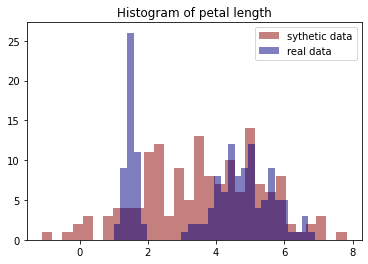

In [165]:

#Feature name: petal length
print("Mean of "+iris_dataset.feature_names[2][:12] +' = '+ str(means[2]))
print("Std of "+iris_dataset.feature_names[2][:12] +' = '+ str(std[2]))
print("Median of "+ iris_dataset.feature_names[2][:12] +' = '+ str(medians[2]))


pyplot.hist(samples[2], bins, alpha=0.5, label='sythetic data', color='darkred')
pyplot.hist(data[2], bins, alpha=0.5, label='real data', color=  "navy")
pyplot.legend(loc='upper right')
pyplot.title("Histogram of "+ iris_dataset.feature_names[2][:12])
pyplot.show()

The synthetic data and real data are a bit different on this graph. The overlapping area is less than the others.

####4. Pedal Width

Mean of petal width  = 1.199333333333334
Std of petal width  = 0.7596926279021594
Median of petal width  = 1.3


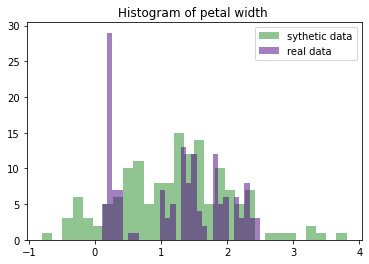

In [166]:

#Feature name: Pedal Width
print("Mean of "+iris_dataset.feature_names[3][:12] +' = '+ str(means[3]))
print("Std of "+iris_dataset.feature_names[3][:12] +' = '+ str(std[3]))
print("Median of "+ iris_dataset.feature_names[3][:12] +' = '+ str(medians[3]))


pyplot.hist(samples[3], bins, alpha=0.5, label='sythetic data', color='forestgreen')
pyplot.hist(data[3], bins, alpha=0.5, label='real data', color=  "indigo")
pyplot.legend(loc='upper right')
pyplot.title("Histogram of "+ iris_dataset.feature_names[3][:12])
pyplot.show()

For pedal width, the overlap is again small but the distribution of fake and real data seems better than the previous graph(petal length).



- For which feature the distributions are most different? What is the reason?

The petal length distributions are most different I guess. The reason is that standart deviation has biggest value in petal length. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. So, in petal length the distributaions spread out more and this makes the difference.

$\mathbf{Exercise\, 4.}$ Estimate and plot the probability density function of the feature $\mbox{petal length (cm)}$.


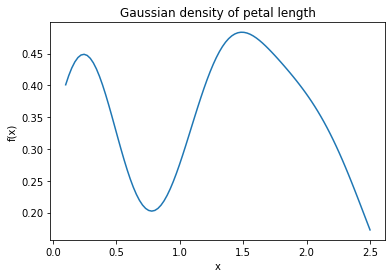

In [167]:
from scipy.stats import gaussian_kde

#Create the kernel, given an array it will estimate the probability over that values
density = gaussian_kde(data[3])

xs = np.linspace(min(data[3]),max(data[3]),100)


plt.plot(xs,density(xs))
plt.title('Gaussian density of petal length')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Assigment 1.2

$\mathbf{Exercise\, 1.}$ Create a linear benchmark, where the dimension of the input data $X$ is 2, and the dimension of the output data $y$ is 1. Choose the amount of noise and sample size.

Evaluate the prediction metrics for the following regression methods:

- Linear regression
- Support Vector Regression with RBF kernel
- Decision Tree Regression


##Create dataset:

In [168]:
np.random.seed(10)


n_input_dimensions = 2
n_output_dimensions = 1
n_samples = 1000

X = np.random.randn(n_input_dimensions*n_samples).reshape(n_input_dimensions,n_samples)


A = np.random.randint(-5,5,n_input_dimensions*n_output_dimensions).reshape(n_output_dimensions,n_input_dimensions)
b = np.random.randint(-20,20,n_output_dimensions)

print('The linear transformation is : \n' + str(A))
print('The constant term is : \n' + str(b))

y = (np.dot(A,X).T + b).T



#Choose noise level as 2.5
noise_level = 2.5
noise = noise_level * np.random.randn(n_output_dimensions*n_samples).reshape(n_output_dimensions,n_samples)

y = y + noise

print()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

#Make train split as 70% 
X_train = X.T[:700]
y_train = y.T[:700]

print()
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)

The linear transformation is : 
[[3 0]]
The constant term is : 
[-8]

X.shape =  (2, 1000)
y.shape =  (1, 1000)

X_train =  (700, 2)
y_train =  (700, 1)


###1. Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###2. SVR with RBF kernel

In [170]:
from sklearn.svm import SVR

#Support Vector Regression with RBF kernel
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.1)

###3. Decision Tree Regressor

In [171]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

$\mathbf{Exercise\, 2.}$ Create a testing dataset and assess the testing metrics for the models.

In [172]:
#Create test dataset:
X_test = X.T[700:]
y_test = y.T[700:]

print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

X_test =  (300, 2)
y_test =  (300, 1)


####1. Linear Regression prediction:

In [173]:
from sklearn import metrics

y_pred_lr = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 2.0459582009149155
Mean Squared Error: 6.321029303974712
Root Mean Squared Error: 2.514165727229355


####2. SVR prediction:

In [174]:

y_pred_svr = svr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

Mean Absolute Error: 2.06178744165007
Mean Squared Error: 6.378360466599843
Root Mean Squared Error: 2.525541618465204


####3. Decision Tree prediction:

In [175]:

y_pred_dt = tree.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

Mean Absolute Error: 2.107704096895223
Mean Squared Error: 6.797134873593526
Root Mean Squared Error: 2.607131541290835


$\mathbf{Exercise\, 3.}$ Plot the regression results (training and testing) for each model

In [176]:
#Define the plotting function:
def plot(X_test, y_test, y_pred):
  n_input_dimensions = 2
  n_output_dimensions = 1
  plt.figure(figsize=(15,10))
  for i in range(n_input_dimensions):
      for j in range(n_output_dimensions):
          plt.subplot(n_input_dimensions, n_output_dimensions, i*n_output_dimensions + j + 1)
          plt.scatter(X_test[:,i],y_test.reshape(-1,1)[:,j],marker = 'o', label = 'ground truth')
          plt.scatter(X_test[:,i],y_pred.reshape(-1,1)[:,j],marker = 'x', label = 'prediction')
          plt.xlabel('x[' + str(i) + ']')
          plt.ylabel('y[' + str(j) + ']')
          plt.legend()
  plt.show()

###1. Linear Regression Plot

In [177]:
X_test.shape,y_test.reshape(-1,1).shape, y_pred_lr.reshape(-1,1).shape

((300, 2), (300, 1), (300, 1))

####1.1 Testing Plot Linear Regression:

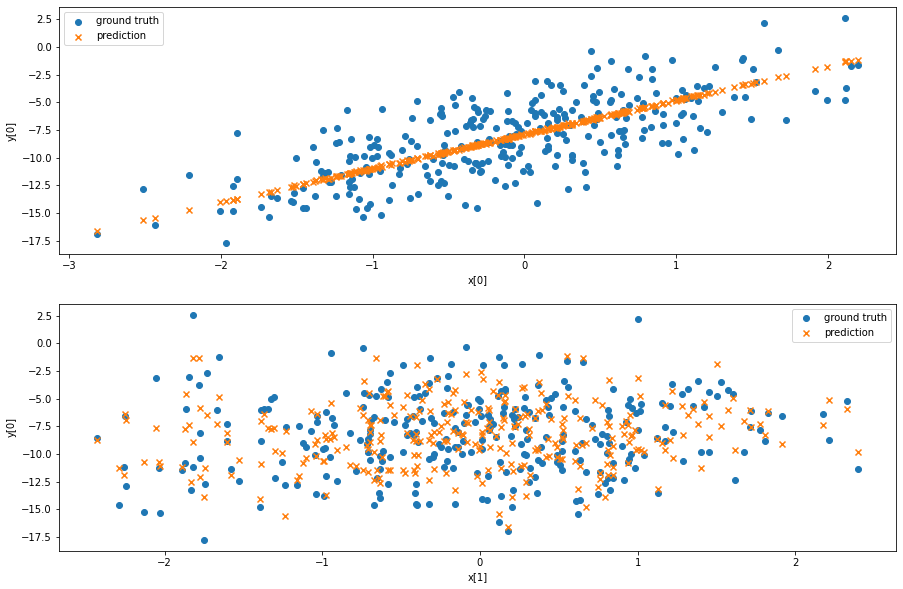

In [178]:
#Plot testing of Linear Regression:
plot(X_test, y_test, y_pred_lr)

####1.2 Training Plot Linear Regression

In [179]:
#Make prediction for X_train
y_pred_lr_train = regressor.predict(X_train)

#See the shapes:
y_train.shape, X_train.shape, y_pred_lr_train.reshape(-1,1).shape

((700, 1), (700, 2), (700, 1))

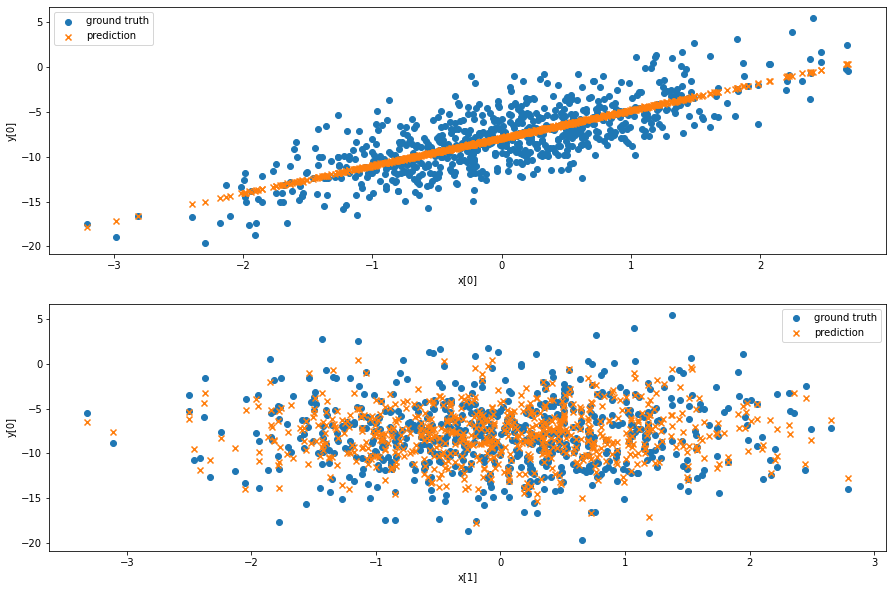

In [141]:
#Plot the traning ground truth and prediction of Linear Regression:
plot(X_train, y_train, y_pred_lr_train)

###2. SVR Plot

####2.1 Testing Plot SVR

In [142]:
X_test.shape,y_test.reshape(-1,1).shape, y_pred_svr.reshape(-1,1).shape

((300, 2), (300, 1), (300, 1))

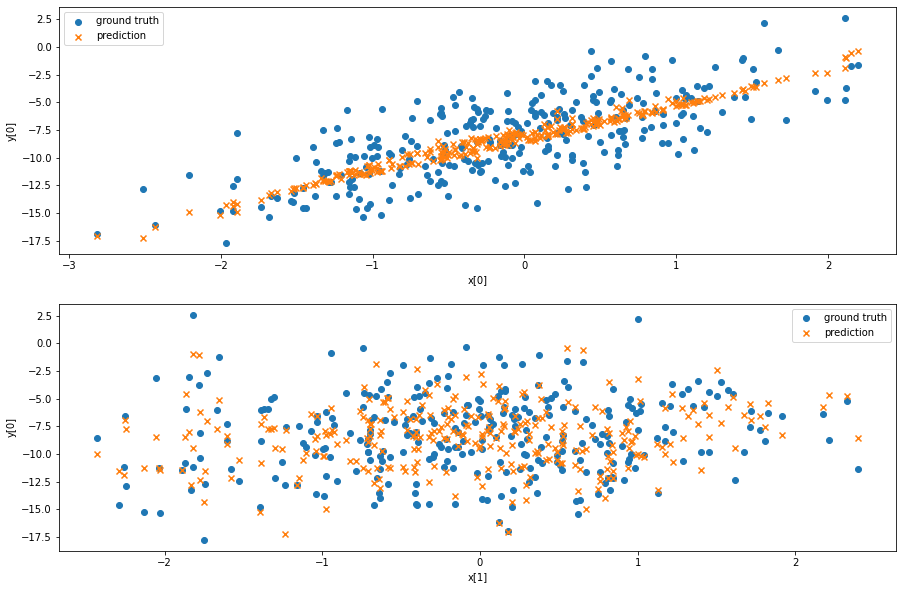

In [143]:
#Plot testing SVR:
plot(X_test, y_test, y_pred_svr)

####2.2 Traning Plot SVR:

In [144]:
#Make prediction for X_train
y_pred_svr_train = svr.predict(X_train)

#See the shapes:
y_train.shape, X_train.shape, y_pred_svr_train.reshape(-1,1).shape

((700, 1), (700, 2), (700, 1))

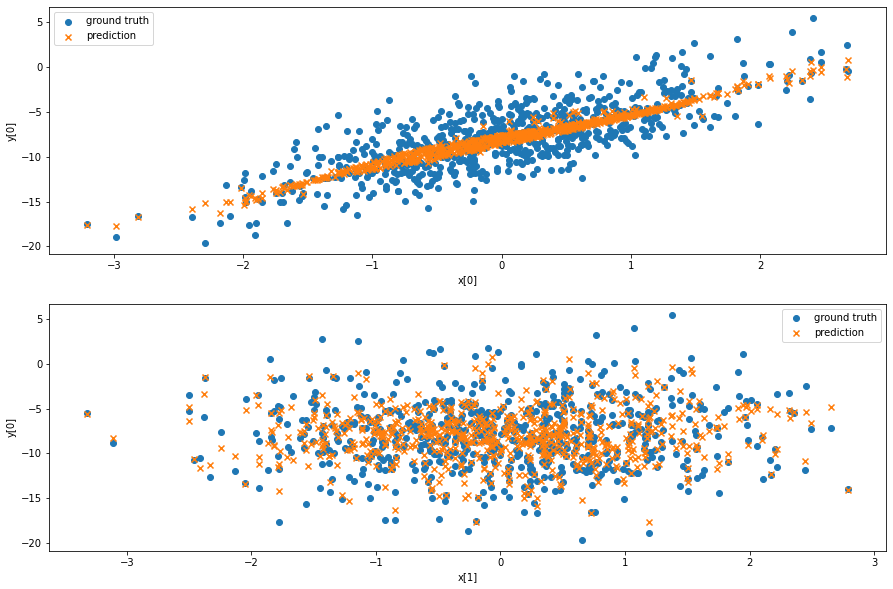

In [145]:
#Plot the traning ground truth and prediction of SVR:
plot(X_train, y_train, y_pred_svr_train)

###3. DECISION TREE PLOT

####3.1 Testing Plot Decision Tree:

In [146]:
X_test.shape,y_test.reshape(-1,1).shape, y_pred_dt.reshape(-1,1).shape

((300, 2), (300, 1), (300, 1))

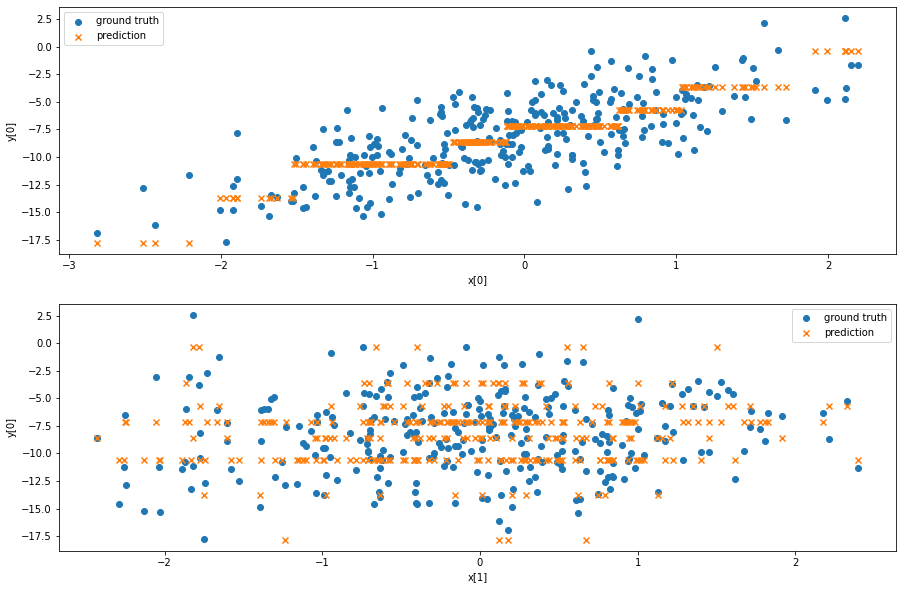

In [147]:
#Plot testing Decision Tree:
plot(X_test, y_test, y_pred_dt)

####3.2 Traninig Plot Decision Tree

In [148]:
#Make prediction for X_train
y_pred_dt_train = tree.predict(X_train)


#See the shapes:
y_train.shape, X_train.shape, y_pred_dt_train.reshape(-1,1).shape

((700, 1), (700, 2), (700, 1))

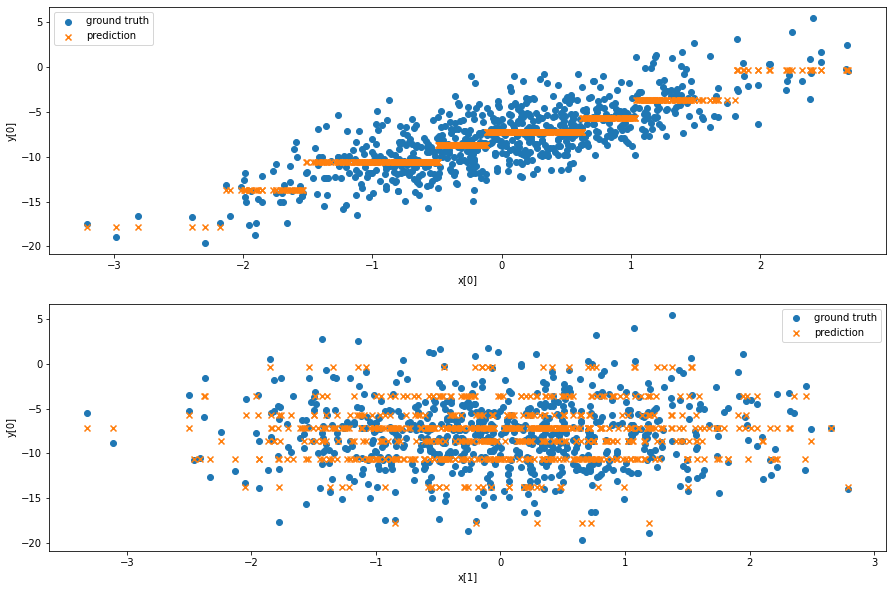

In [149]:
#Plot the traning ground truth and prediction of Decision Tree:
plot(X_train, y_train, y_pred_dt_train)

$\mathbf{Exercise\, 4.}$ Create a classification benchmark with 3 labels.

Evaluate training and testing prediction metrics for the following classification methods:

- K-nearest neighbours
- Random Forest
- Naive Bayes

Create dataset:

In [150]:
X = np.random.randn(1000,2)

#Let random integers be in the list [0,1,2] that represents three different class labels.
y = np.random.randint(0,3,1000)

#Make train-test split as 70% and 30%
X_train = X[:700]
y_train = y[:700]

X_test = X[700:]
y_test = y[700:]
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)

print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

print("Class labels are ", np.unique(y))

X_train =  (700, 2)
y_train =  (700,)
X_test =  (300, 2)
y_test =  (300,)
Class labels are  [0 1 2]


###1- KNeighborsClassifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier

#Try different k values:
test_scores = []
train_scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))
    
k_max = test_scores.index(max(test_scores))
print("The maximum test score =",max(test_scores), ", with k =", k_max+1)
print("The maximum train score =",train_scores[k_max], ", with k =", k_max+1)


The maximum test score = 0.33666666666666667 , with k = 14
The maximum train score = 0.4228571428571429 , with k = 14


In [152]:
print("The number of classes is 3. Therefore, the test score when k=3 is ", test_scores[2])

The number of classes is 3. Therefore, the test score when k=3 is  0.2966666666666667


### 2- Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


clf_rand_forest = RandomForestClassifier(max_depth=3, random_state=0)
clf_rand_forest.fit(X_train, y_train)

y_pred=clf_rand_forest.predict(X_test)
acc_testing = accuracy_score(y_test, y_pred)

print("Testing score = ", acc_testing)
#Let's see the calssification report:
print(classification_report(y_test, y_pred))

Testing score =  0.30666666666666664
              precision    recall  f1-score   support

           0       0.34      0.30      0.32       102
           1       0.30      0.42      0.35        98
           2       0.28      0.20      0.23       100

    accuracy                           0.31       300
   macro avg       0.31      0.31      0.30       300
weighted avg       0.31      0.31      0.30       300



In [154]:
#Traning Error:
y_pred_train = clf_rand_forest.predict(X_train)

#Let's see the calssification report:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48       237
           1       0.45      0.60      0.51       231
           2       0.55      0.42      0.48       232

    accuracy                           0.49       700
   macro avg       0.50      0.49      0.49       700
weighted avg       0.50      0.49      0.49       700



###3- GaussianNB

In [155]:
from sklearn.naive_bayes import GaussianNB 

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
acc_testing = accuracy_score(y_test, y_pred)

print("Testing score = ", acc_testing)
#Let's see the calssification report:
print(classification_report(y_test, y_pred))

Testing score =  0.32
              precision    recall  f1-score   support

           0       0.36      0.28      0.32       102
           1       0.34      0.40      0.37        98
           2       0.27      0.28      0.27       100

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.32       300
weighted avg       0.32      0.32      0.32       300



In [163]:
#Traning Error:
y_pred_train = clf.predict(X_train)

#Let's see the calssification report of traning data:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       237
           1       0.37      0.44      0.40       231
           2       0.37      0.37      0.37       232

    accuracy                           0.37       700
   macro avg       0.37      0.37      0.37       700
weighted avg       0.37      0.37      0.37       700

